# Regression Algorithm

Implement the non-parametric locally weighted regression algorithm in order to fit data points. Select appropriate data set for your experience and draw graphs.

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [27]:
def kernel(point,xmat,k):
    m,n = np.shape(xmat)
    weights = np.mat(np.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T / (-2.0*k**2))
    return weights

In [28]:
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    w = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return w

In [29]:
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred

In [30]:
data = pd.read_csv('lab6.csv')
bill = np.array(data.total_bill)
tip = np.array(data.tip)

In [31]:
mbill = np.mat(bill)
mtip = np.mat(tip)
m = np.shape(mbill)[1]
one = np.mat(np.ones(m))
X = np.hstack((one.T,mbill.T))

In [32]:
ypred = localWeightRegression(X,mtip,2)
sortIndex = X[:,-1].argsort(0)
xsort = X[sortIndex][:,0]

Text(0, 0.5, 'Tip')

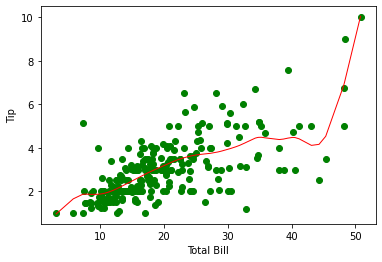

In [33]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(bill,tip,color='green')
ax.plot(xsort[:,1],ypred[sortIndex],color='red',linewidth=1)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
#plt.show()